In [ ]:
import numpy as np   # biblioteca para cálculo matricial e ele também fornece estruturas de dados para o pandas
import pandas as pd  # biblioteca para análise e transformação de dados

In [ ]:
# vamos ler o arquivo Companhia_MB.txt
filename = '/content/drive/MyDrive/FIA/Companhia_MB.txt'
df = pd.read_csv(filename, sep='\t')

In [ ]:
# mostra apenas as 5 primeiras linhas
df.head()

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia
0,1,solteiro,1-ensino fundamental,NaN,4.00,26,interior
1,2,casado,1-ensino fundamental,1.0,4.56,32,capital
2,3,casado,1-ensino fundamental,2.0,5.25,36,capital
3,4,solteiro,2-ensino medio,NaN,5.73,20,outra
4,5,solteiro,1-ensino fundamental,NaN,6.26,40,outra


In [ ]:
# mostra as últimas 5 linhas
df.tail()

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia
31,32,casado,2-ensino medio,1.0,16.61,36,interior
32,33,casado,3-superior,3.0,17.26,43,capital
33,34,solteiro,3-superior,NaN,18.75,33,capital
34,35,casado,2-ensino medio,2.0,19.40,48,capital
35,36,casado,3-superior,3.0,23.30,42,interior


In [ ]:
# retorna uma tupla onde o primeiro elemento é a quantidade de linhas e o segundo a quantidade de colunas
df.shape

(36, 7)

In [ ]:
# obter uma lista com o nome das colunas
df.columns.tolist()

['N',
 'estado_civil',
 'grau_instrucao',
 'n_filhos',
 'salario',
 'idade_anos',
 'reg_procedencia']

In [ ]:
# mostra informações adicionais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N                36 non-null     int64  
 1   estado_civil     36 non-null     object 
 2   grau_instrucao   36 non-null     object 
 3   n_filhos         20 non-null     float64
 4   salario          36 non-null     float64
 5   idade_anos       36 non-null     int64  
 6   reg_procedencia  36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
# mostra a quantidade de valores nulos por coluna
df.isnull().sum()

N                   0
estado_civil        0
grau_instrucao      0
n_filhos           16
salario             0
idade_anos          0
reg_procedencia     0
dtype: int64

In [ ]:
# mostra o percentual de valores nulos por coluna
df.isnull().sum() / df.shape[0]

N                  0.000000
estado_civil       0.000000
grau_instrucao     0.000000
n_filhos           0.444444
salario            0.000000
idade_anos         0.000000
reg_procedencia    0.000000
dtype: float64

# Análise Univariada

## Variáveis Qualitativas

In [ ]:
# tabela descritiva
df.describe(include=['object'])

,estado_civil,grau_instrucao,reg_procedencia
count,36,36,36
unique,2,3,3
top,casado,2-ensino medio,outra
freq,20,18,13


In [ ]:
# contagem de frequência absoluta
tab_grau_instrucao = df['grau_instrucao'].value_counts()
tab_grau_instrucao

2-ensino medio          18
1-ensino fundamental    12
3-superior               6
Name: grau_instrucao, dtype: int64

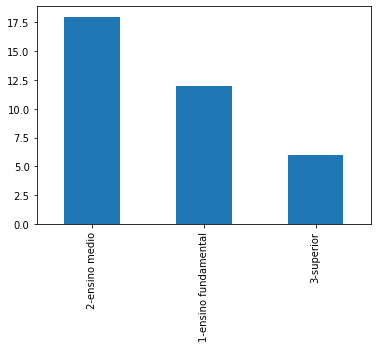

In [ ]:
# Gráfico de Barras da frequência absoluta
tab_grau_instrucao.plot(kind='bar');

In [ ]:
# tabela de frequência relativa
tab_grau_instrucao_p = df['grau_instrucao'].value_counts(normalize=True)
tab_grau_instrucao_p

2-ensino medio          0.500000
1-ensino fundamental    0.333333
3-superior              0.166667
Name: grau_instrucao, dtype: float64

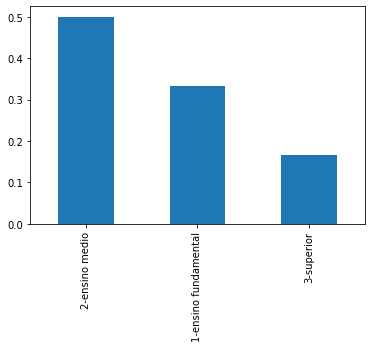

In [ ]:
# gráfico de barras da frequência relativa
tab_grau_instrucao_p.plot(kind='bar');

### Exercício 1

Calcular as frequências absoluta e relativas para a variável `estado_civil` e construa os gráficos de barras.

In [ ]:
df['estado_civil'].value_counts()

casado      20
solteiro    16
Name: estado_civil, dtype: int64

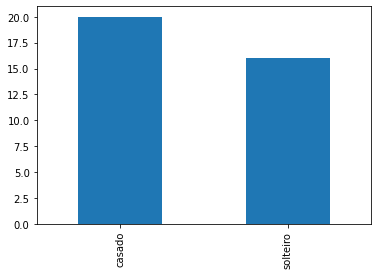

In [ ]:
df['estado_civil'].value_counts().plot(kind='bar');

In [ ]:
df['estado_civil'].value_counts(normalize=True)

casado      0.555556
solteiro    0.444444
Name: estado_civil, dtype: float64

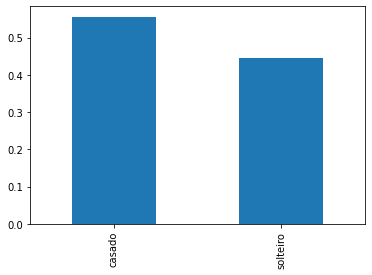

In [ ]:
df['estado_civil'].value_counts(normalize=True).plot(kind='bar');

### Exercício 2

Calcular as frequências absoluta e relativa para a variável `reg_procedencia` e construa os gráficos de barras.

In [ ]:
df['reg_procedencia'].value_counts()

outra       13
interior    12
capital     11
Name: reg_procedencia, dtype: int64

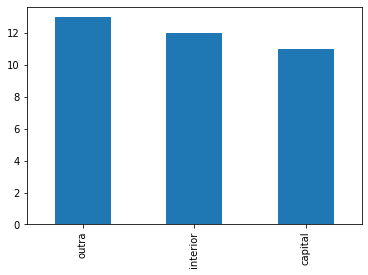

In [ ]:
df['reg_procedencia'].value_counts().plot(kind='bar');

In [ ]:
df['reg_procedencia'].value_counts(normalize=True)

outra       0.361111
interior    0.333333
capital     0.305556
Name: reg_procedencia, dtype: float64

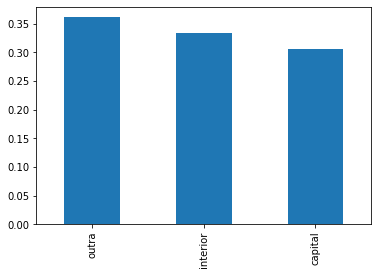

In [ ]:
df['reg_procedencia'].value_counts(normalize=True).plot(kind='bar');

## Variáveis Quantitativas

In [ ]:
df.describe()

,N,n_filhos,salario,idade_anos
count,36.000000,20.000000,36.000000,36.000000
mean,18.500000,1.650000,11.122222,34.583333
std,10.535654,1.268028,4.587458,6.737422
min,1.000000,0.000000,4.000000,20.000000
25%,9.750000,1.000000,7.552500,30.000000
50%,18.500000,2.000000,10.165000,34.500000
75%,27.250000,2.000000,14.060000,40.000000
max,36.000000,5.000000,23.300000,48.000000


In [ ]:
df['salario'].describe()

count    36.000000
mean     11.122222
std       4.587458
min       4.000000
25%       7.552500
50%      10.165000
75%      14.060000
max      23.300000
Name: salario, dtype: float64

### Boxplot

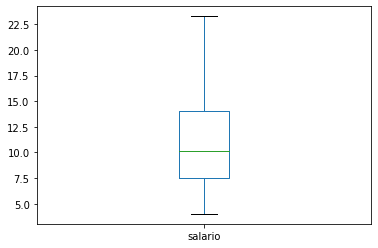

In [ ]:
df['salario'].plot(kind='box');

In [ ]:
# Quartis: Q1 e Q3
Q1 = np.quantile(df['salario'], 0.25)
Q3 = np.quantile(df['salario'], 0.75)

intervalo_IQ = Q3 - Q1

lim_sup = Q3 + 1.5 * intervalo_IQ
lim_inf = Q1 - 1.5 * intervalo_IQ

print(f"Primeiro Quartil = {Q1}")
print(f"Terceiro Quartil = {Q3}")
print(f"Limite Superior  = {lim_sup}")
print(f"Limite Inferior  = {lim_inf}")

Primeiro Quartil = 7.5525
Terceiro Quartil = 14.059999999999999
Limite Superior  = 23.821249999999996
Limite Inferior  = -2.2087499999999967


### Exercício 3

Calcular as estatísticas para a variável `idade_anos` e obter o boxplot, juntamente com o primeiro e terceiro quartil, intervalo inter-quartil e limites inferiores e superiores.

In [ ]:
df['idade_anos'].describe()

count    36.000000
mean     34.583333
std       6.737422
min      20.000000
25%      30.000000
50%      34.500000
75%      40.000000
max      48.000000
Name: idade_anos, dtype: float64

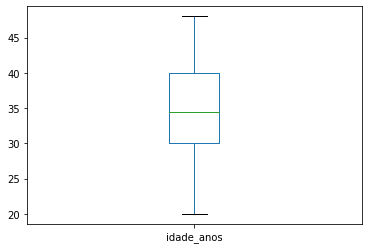

In [ ]:
df['idade_anos'].plot(kind='box');

### Exercício 4

Calcular as estatísticas para a variável `n_filhos` e obter o boxplot, juntamente com o primeiro e terceiro quartil, intervalo inter-quartil e limites inferiores e superiores.

dica: se a variável conter missing values, utilizar a função `np.nanquantile()`

In [ ]:
df['n_filhos'].describe()

count    20.000000
mean      1.650000
std       1.268028
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: n_filhos, dtype: float64

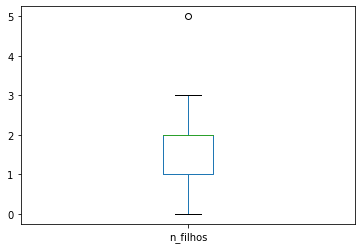

In [ ]:
df['n_filhos'].plot(kind='box');

In [ ]:
# Quartis: Q1 e Q3
Q1 = np.nanquantile(df['n_filhos'], 0.25)
Q3 = np.nanquantile(df['n_filhos'], 0.75)

intervalo_IQ = Q3 - Q1

lim_sup = Q3 + 1.5 * intervalo_IQ
lim_inf = Q1 - 1.5 * intervalo_IQ

print(f"Primeiro Quartil = {Q1}")
print(f"Terceiro Quartil = {Q3}")
print(f"Limite Superior  = {lim_sup}")
print(f"Limite Inferior  = {lim_inf}")

Primeiro Quartil = 1.0
Terceiro Quartil = 2.0
Limite Superior  = 3.5
Limite Inferior  = -0.5


### Histograma

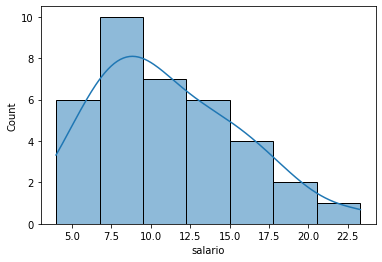

In [ ]:
# Vamos utilizar a funçaõ `histplot` do seaborn
import seaborn as sns

sns.
(data=df, x='salario', kde=True);

### Exercício 5
Construa os histogramas para as variávels `idade_anos` e `n_filhos`.

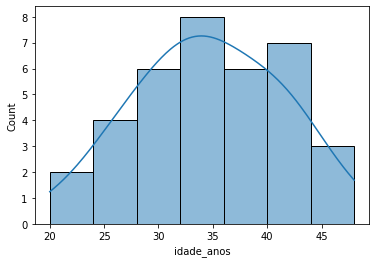

In [ ]:
,   sns.histplot(data=df, x='idade_anos', kde=True);

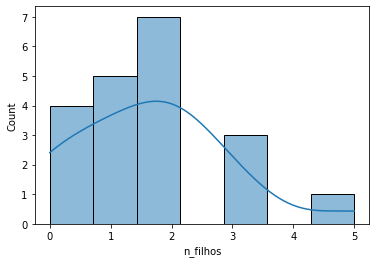

In [ ]:
sns.histplot(data=df, x='n_filhos', kde=True);

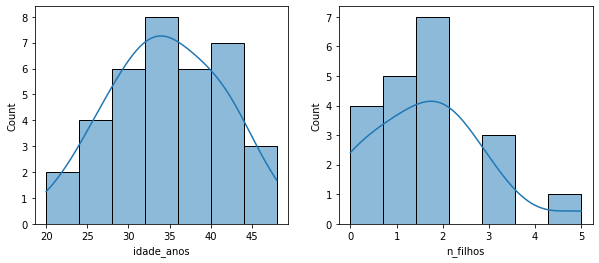

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

sns.histplot(data=df, x='idade_anos', kde=True, ax=ax[0]);
sns.histplot(data=df, x='n_filhos', kde=True, ax=ax[1]);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análise Bivariada

**Continuar a próxima aula a partir daqui.**

Para análise bivariada, a biblioteca `seaborn` oferece excelentes gráficos!

## Qualitativa x Qualitativa

### Tabela de frequências cruzadas

In [ ]:
# Tabela de frequências cruzadas (Tabela de contingência)
pd.crosstab(df['estado_civil'], df['grau_instrucao'])

grau_instrucao,1-ensino fundamental,2-ensino medio,3-superior
estado_civil,,,
casado,5,12,3
solteiro,7,6,3


In [ ]:
# Tabela de contingência (relativo a linha): Estado Civil e Grau de Instrução
pd.crosstab(df['estado_civil'], df['grau_instrucao'], normalize='index')

grau_instrucao,1-ensino fundamental,2-ensino medio,3-superior
estado_civil,,,
casado,0.2500,0.600,0.1500
solteiro,0.4375,0.375,0.1875


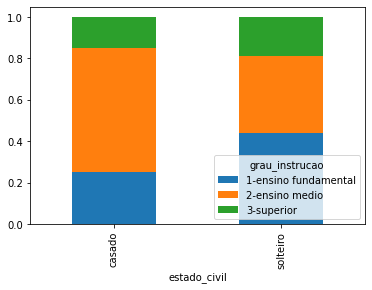

In [ ]:
# Gráfico de barras empilhadas usando plot, tipo = gráfico de barra
tab_perc = pd.crosstab(df['estado_civil'], df['grau_instrucao'], normalize='index')
tab_perc.plot(kind='bar', stacked=True);

In [ ]:
# Tabela de contingência (relativo a linha): Grau de Instrução e Estado Civil
pd.crosstab(df['grau_instrucao'], df['estado_civil'], normalize='index')

estado_civil,casado,solteiro
grau_instrucao,,
1-ensino fundamental,0.416667,0.583333
2-ensino medio,0.666667,0.333333
3-superior,0.500000,0.500000


### Exercício 6

Realize a análise para as variáveis `grau_instrucao` e `reg_procedencia`

In [ ]:
pd.crosstab(df['reg_procedencia'], df['grau_instrucao'])

grau_instrucao,1-ensino fundamental,2-ensino medio,3-superior
reg_procedencia,,,
capital,4,5,2
interior,3,7,2
outra,5,6,2


In [ ]:
np.round(pd.crosstab(df['reg_procedencia'], df['grau_instrucao'], normalize='index'), 2)

grau_instrucao,1-ensino fundamental,2-ensino medio,3-superior
reg_procedencia,,,
capital,0.36,0.45,0.18
interior,0.25,0.58,0.17
outra,0.38,0.46,0.15


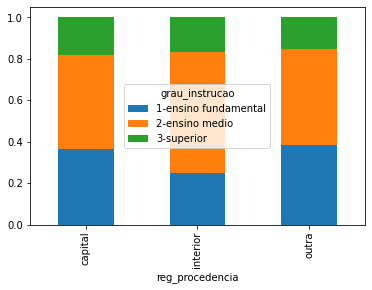

In [ ]:
pd.crosstab(df['reg_procedencia'], df['grau_instrucao'], normalize='index').plot(kind='bar', stacked=True);

## Qualitativa x Quantitativa

### Medidas Resumo 

Medidas resumo da variável quantitativa para cada valor da variável qualitativa

In [ ]:
# definindo função do modo tradicional
def q1(x):return x.quantile(0.25)
def q3(x):return x.quantile(0.75)

# definindo funções usando lambda expressions
#q1 = lambda x: x.quantile(0.25)
#q2 = lambda x: x.quantile(0.75)

# agregando do jeito tradicional
df.groupby(['grau_instrucao']).agg({'salario':['sum', 'min', 'mean', q1, 'median', q3, 'max', 'var', 'std']})

salario                    ...                            
                         sum    min       mean  ...    max        var       std
grau_instrucao                                  ...                            
1-ensino fundamental   94.04   4.00   7.836667  ...  13.85   8.740679  2.956464
2-ensino medio        207.51   5.73  11.528333  ...  19.40  13.802297  3.715144
3-superior             98.85  10.53  16.475000  ...  23.30  20.271950  4.502438

[3 rows x 9 columns]

In [ ]:
# agregando uma operação por vez, forma mais recente de se fazer agrupamentos e que permite já renomear
# as colunas agregadas

(
    df
    .groupby(['grau_instrucao'])
    .agg(salario_sum    = ('salario', 'sum'),
         salario_min    = ('salario', 'min'),
         salario_mean   = ('salario', 'mean'),
         salario_q1     = ('salario', q1),
         salario_median = ('salario', 'median'),
         salario_q3     = ('salario', q3),
         salario_max    = ('salario', 'max'),
         salario_var    = ('salario', 'var'),
         salario_std    = ('salario', 'std'))
    .reset_index()
)

,grau_instrucao,salario_sum,salario_min,salario_mean,salario_q1,salario_median,salario_q3,salario_max,salario_var,salario_std
0,1-ensino fundamental,94.04,4.00,7.836667,6.0075,7.125,9.1625,13.85,8.740679,2.956464
1,2-ensino medio,207.51,5.73,11.528333,8.8375,10.910,14.4175,19.40,13.802297,3.715144
2,3-superior,98.85,10.53,16.475000,13.6475,16.740,18.3775,23.30,20.271950,4.502438


### Boxplot

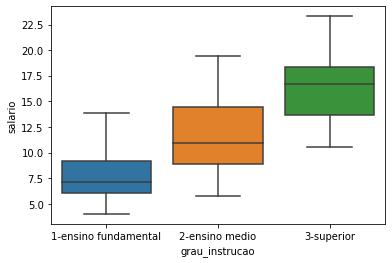

In [ ]:
sns.boxplot(x=df['grau_instrucao'], y=df['salario']);

### Exercício 7

Realize a análise para as variáveis `estado_civil` e `idade_anos`

In [ ]:
df.groupby(['estado_civil']).agg({'idade_anos':['sum', 'min', 'mean', q1, 'median', q3, 'max', 'var', 'std']})

idade_anos                     ...                                
                    sum min    mean     q1  ...     q3 max        var       std
estado_civil                                ...                                
casado              703  26  35.150  30.75  ...  39.25  48  34.765789  5.896252
solteiro            542  20  33.875  26.75  ...  40.25  46  60.916667  7.804913

[2 rows x 9 columns]

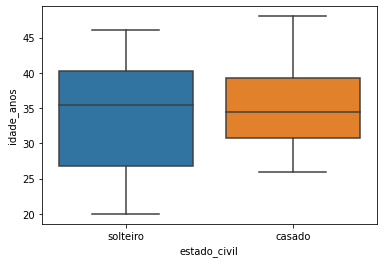

In [ ]:
sns.boxplot(x=df['estado_civil'], y=df['idade_anos']);

## Quantitativa x Quantitativa

### Gráfico de dispersão (Scatter Plot)

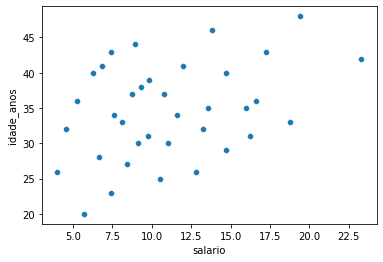

In [ ]:
# função scatterplot do seaborn (sns)
sns.scatterplot(x=df['salario'], y=df['idade_anos']);

In [ ]:
# coeficiente de correlação, usando numpy (np)
np.corrcoef(x=df['salario'], y=df['idade_anos'])

array([[1.        , 0.36336218],
       [0.36336218, 1.        ]])

,N,n_filhos,salario,idade_anos
N,1.000000,0.339659,0.972384,0.334687
n_filhos,0.339659,1.000000,0.358065,0.746539
salario,0.972384,0.358065,1.000000,0.363362
idade_anos,0.334687,0.746539,0.363362,1.000000


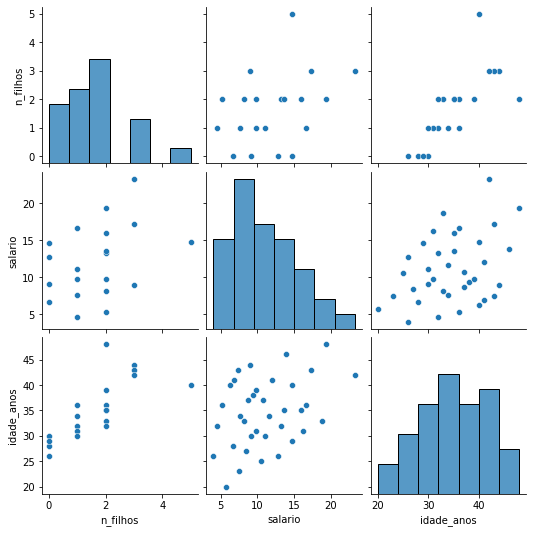

In [ ]:
# Matriz de gráficos bidimensionais
sns.pairplot(df[['n_filhos', 'salario', 'idade_anos']])
df.corr()

# Exercício Final

Crie um novo notebook e faça uma análise exploratória da base do titanic. Cada linha dessa base representa um passageiro com suas devidas informações como sexo, idade, classe econômica, se sobrevivou ou não e etc.

A base do titanic está na pasta `data` com o nome `titanic.csv`.

Algumas perguntas interessantes para começar a sua análise exploratória:

* *Qual a distribuição de homens e mulheres na base?* (**univariada**)
* *Quem mais sobreviveu: mulheres ou homens?* (**bivariada**)
* *Qual a distribuição dos passageiros por classe econômia?* (**univariada**)
* *Quem mais sobreviveu por classe econômica?* (**bivariada**)

